<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/v2/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data structure creating

In [1]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc
        self.root_depth = None

In [2]:
import networkx as nx

class Sentence:
    def __init__(self, sentence_type):
        self.text = ""
        self.sent_id = ""
        self.tokens = []
        self.sentence_type = sentence_type
        self.graph = None


    def add_token(self, token):
        self.tokens.append(token)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.tokens) > 0

    def create_graph(self):
      self.graph = nx.DiGraph()
      self.graph.add_node('0', word='root')
      for w in self.tokens:
        self.graph.add_node(w.id, word=w.form)
      for w in self.tokens:
        self.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

      for t in self.tokens:
          t.root_depth = nx.shortest_path_length(self.graph, '0', t.id)

# Treebank data getting

In [3]:
import os

def get_treebank_file(path):
    get_command = f"wget -m {path}"
    print(get_command)
    os.system(get_command)
    download_path = "/content/" + path.replace("https://", "")
    itog_path = "/content/" + path.split("/")[-1]
    mv_command = f"mv {download_path} {itog_path}"
    print(mv_command)
    os.system(mv_command)
    return itog_path

In [4]:
class TreebankData:
    def __init__(self, train_files, dev_files, test_files):
        self.train = []
        for path in train_files:
            conll_path = get_treebank_file(path)
            self.train += self.read_conll(conll_path, "train")

        self.dev = []
        for path in dev_files:
            conll_path = get_treebank_file(path)
            self.dev += self.read_conll(conll_path, "dev")

        self.test = []
        for path in test_files:
            conll_path = get_treebank_file(path)
            self.test += self.read_conll(conll_path, "test")

    def read_conll(self, filename, sentence_type):
        fh = open(filename,'r',encoding='utf-8')
        sents_read = 0
        sents = []
        comments = set()

        sent = Sentence(sentence_type)
        for line in fh:
            tok = line.strip().split('\t')
            if not tok or line.strip() == '': # empty line, add sentence to list
                if sent.is_not_empty:
                    sents_read += 1
                    sents.append(sent)
                sent = Sentence(sentence_type)
            else:
                if line[0] == '#' or '-' in tok[0]: # a comment line
                    line = line.strip()
                    if line[:12] == "# sent_id = ":
                        sent.set_sent_id(line[12:])
                    elif line[:9] == "# text = ":
                        sent.set_text(line[9:])
                    else:
                        comments.add(line)

                else: # an actual ConllEntry, add to tokens
                    if tok[2] == "_":
                        tok[2] = tok[1].lower()

                    token = ConllEntry(*tok)
                    sent.add_token(token)
        fh.close()
        return sents


In [5]:
treebank_info = { "rus" : "syntagrus"
                 , "ar": "padt"
                 , 'bdt': "bdt"
                 , 'fi': "tdt"
                 , 'he': "htb"
                 , 'hi': "hdtb"
                 , 'it': "isdt"
                 , 'ja': "gsd"
                 , 'ko': "gsd"
                 , 'sv': "talbanken"
                 , 'tr': "imst"
                 , 'eng': "ewt"
                 , 'chi': "gsd"
                 }

In [6]:
treebank_paths = { 'rus': ( [ "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu"])
                 , 'ar': (["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu"])
                 , 'bdt': ( ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu"])
                 , 'fi': ( ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-test.conllu"])
                 , 'he': ( ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-test.conllu"])
                 , 'hi': ( ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-test.conllu"])
                 , 'it': ( ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-test.conllu"])
                 , 'ja': ( ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-test.conllu"])
                 , 'ko': ( ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-test.conllu"])
                 , 'sv': ( ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-test.conllu"])
                 , 'tr': ( ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-test.conllu"])
                 , 'eng': (["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu"])
                 , 'chi': ( ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu"] )
                 }

In [7]:
treebanks = {}
for treebank_name, (train_files, dev_files, test_files) in treebank_paths.items():
    print(train_files, dev_files, test_files)
    treebanks[treebank_name] = TreebankData(train_files, dev_files, test_files)

['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu']
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-trai

In [8]:
languages = treebanks.keys()
languages = sorted(list(languages))
print(languages)

['ar', 'bdt', 'chi', 'eng', 'fi', 'he', 'hi', 'it', 'ja', 'ko', 'rus', 'sv', 'tr']


## Ellipsis deleting

An ellipsis sentence contains a technical token whose index includes '.'

Such tokens must be deleted for the research

In [9]:
[(t.id, t.form) for t in treebanks['rus'].train[44].tokens]

[('1', '-'),
 ('2', 'Я'),
 ('2.1', '_'),
 ('3', 'насчет'),
 ('4', 'работы'),
 ('5', '…')]

In [10]:
def delete_point_tokens(s):
  s.tokens = [t for t in s.tokens if "." not in t.id]
  return s

sents = {}
for treebank_name, treebank_data in treebanks.items():
    lang_sents = treebank_data.train + \
                  treebank_data.dev + \
                  treebank_data.test
    sents[treebank_name] = [delete_point_tokens(s) for s in lang_sents]

In [11]:
[(t.id, t.form) for t in sents['rus'][44].tokens]

[('1', '-'), ('2', 'Я'), ('3', 'насчет'), ('4', 'работы'), ('5', '…')]

Creating dependency graphs via networkx


In [12]:
for lang in languages:
    for sent in sents[lang]:
        sent.create_graph()

# Dataset sizes

In [13]:
from collections import Counter
from itertools import groupby

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [14]:
!mkdir /content/imgs

In [15]:
results = { lang: [len(treebanks[lang].train) / len(sents[lang])
                      , len(treebanks[lang].dev) / len(sents[lang])
                      , len(treebanks[lang].test) / len(sents[lang])] for lang in languages }

In [16]:
def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

In [17]:
sent_types = ["train", "dev", "test"]

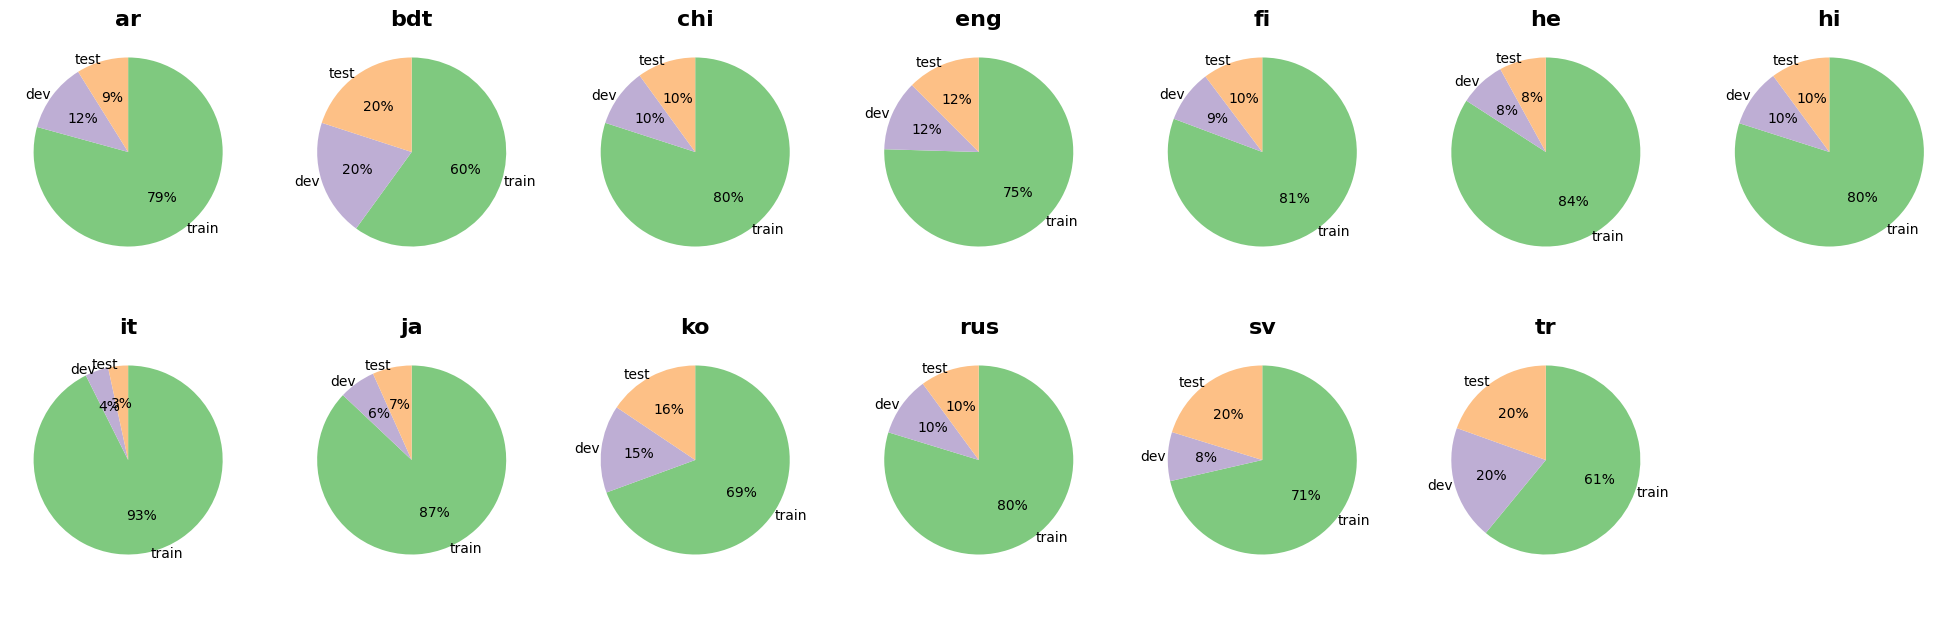

In [18]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(25, 8))

plt.subplots_adjust(wspace=0.2, hspace=0)
all_colors = colormaps['Accent'].colors
ax[-1, -1].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_lens = [len(treebanks[lang].train) / len(sents[lang])
                      , len(treebanks[lang].dev) / len(sents[lang])
                      , len(treebanks[lang].test) / len(sents[lang])]
    cur_ax.pie(lang_lens, labels=sent_types, autopct=lambda d: f"{d:.0f}%",
               labeldistance=1.02, counterclock=False, startangle=90, colors=all_colors)
    cur_ax.set_title(lang, size=16, weight="bold")
plt.savefig('imgs/dataset_pies.eps', format='eps', dpi=300)
plt.show()


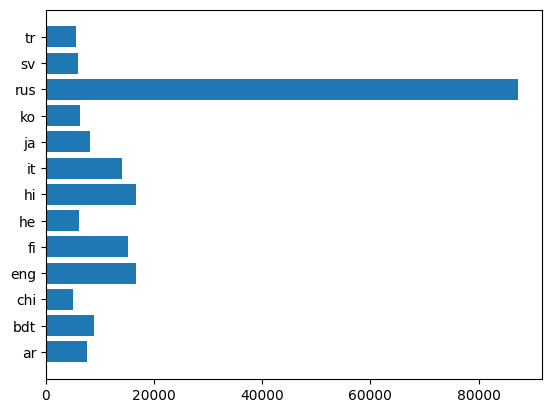

In [19]:
plt.barh(languages, [len(sents[lang]) for lang in languages])
plt.savefig('imgs/dataset_sizes.eps', format='eps', dpi=300)
plt.show()

In [20]:
for lang in languages:
  print(lang, len(sents[lang]))

ar 7664
bdt 8993
chi 4997
eng 16622
fi 15136
he 6143
hi 16649
it 14167
ja 8100
ko 6339
rus 87336
sv 6026
tr 5635


# Количество токенов в предложении

In [21]:
def token_length_group(s):
    if len(s.tokens) >= 50:
      return "50+"
    coeff = len(s.tokens) // 10
    return f"{coeff * 10}-{(coeff + 1) * 10}"

sentence_length_categories = ('0-10', '10-20', '20-30', '30-40', '40-50', '50+')

In [22]:
def sentence_length_type_bar(lang, cur_ax, legend=False):

    lengths = {}
    sent_type_amount = {}
    for sent_type in sent_types:
        sentence_length_counter = Counter(map(token_length_group,
                              [s for s in sents[lang] if s.sentence_type==sent_type]))
        sent_type_amount[sent_type] = sentence_length_counter.total()
        type_lengths = {c: sentence_length_counter.get(c, 0) for c in sentence_length_categories}
        lengths[sent_type] = type_lengths


    bottom = np.zeros(len(sent_types))
    width = 0.9
    c_dict = {}
    all_colors = colormaps['Paired'].colors
    for i, c in enumerate(sentence_length_categories):
        c_length = [lengths[sent_t][c] for sent_t in sent_types]
        c_rate_array = np.array([c_length[i] / sent_type_amount[sent_t] for i, sent_t in enumerate(sent_types)])
        p = cur_ax.bar(sent_types, c_rate_array, width, bottom=bottom,
                    label=c, color = all_colors[i])
        bottom += c_rate_array

        cur_ax.bar_label(p, label_type='center',
                      labels = [f"{c_length[i]:.0f} ({v*100:.0f}%)" if v >= 0.03 else ""
                                  for i, v in enumerate(c_rate_array)])
    cur_ax.axes.yaxis.set_visible(False)
    cur_ax.set_ylim([0, 1.1])
    cur_ax.set_title(lang, size=16, weight="bold")
    if legend:
        cur_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #cur_ax.title(lang)


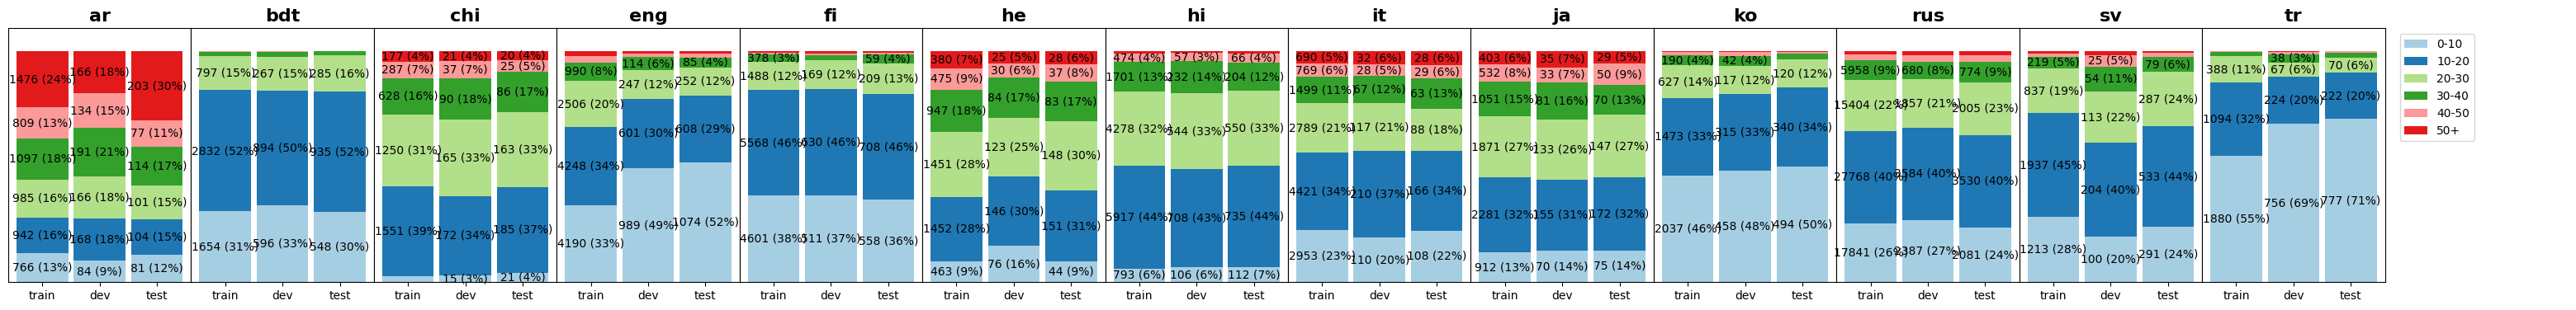

In [62]:
x_count = 1
y_count = 14
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4))
#f.suptitle('Распределение длины зависимостей')

plt.subplots_adjust(wspace=0, hspace=0.2)
ax[-1].axis('off')
#ax[-1, -2].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    legend = False if i != len(languages) - 1 else True
    sentence_length_type_bar(lang, cur_ax, legend)

plt.savefig('imgs/sentence_length.eps', format='eps', dpi=300)
plt.show()


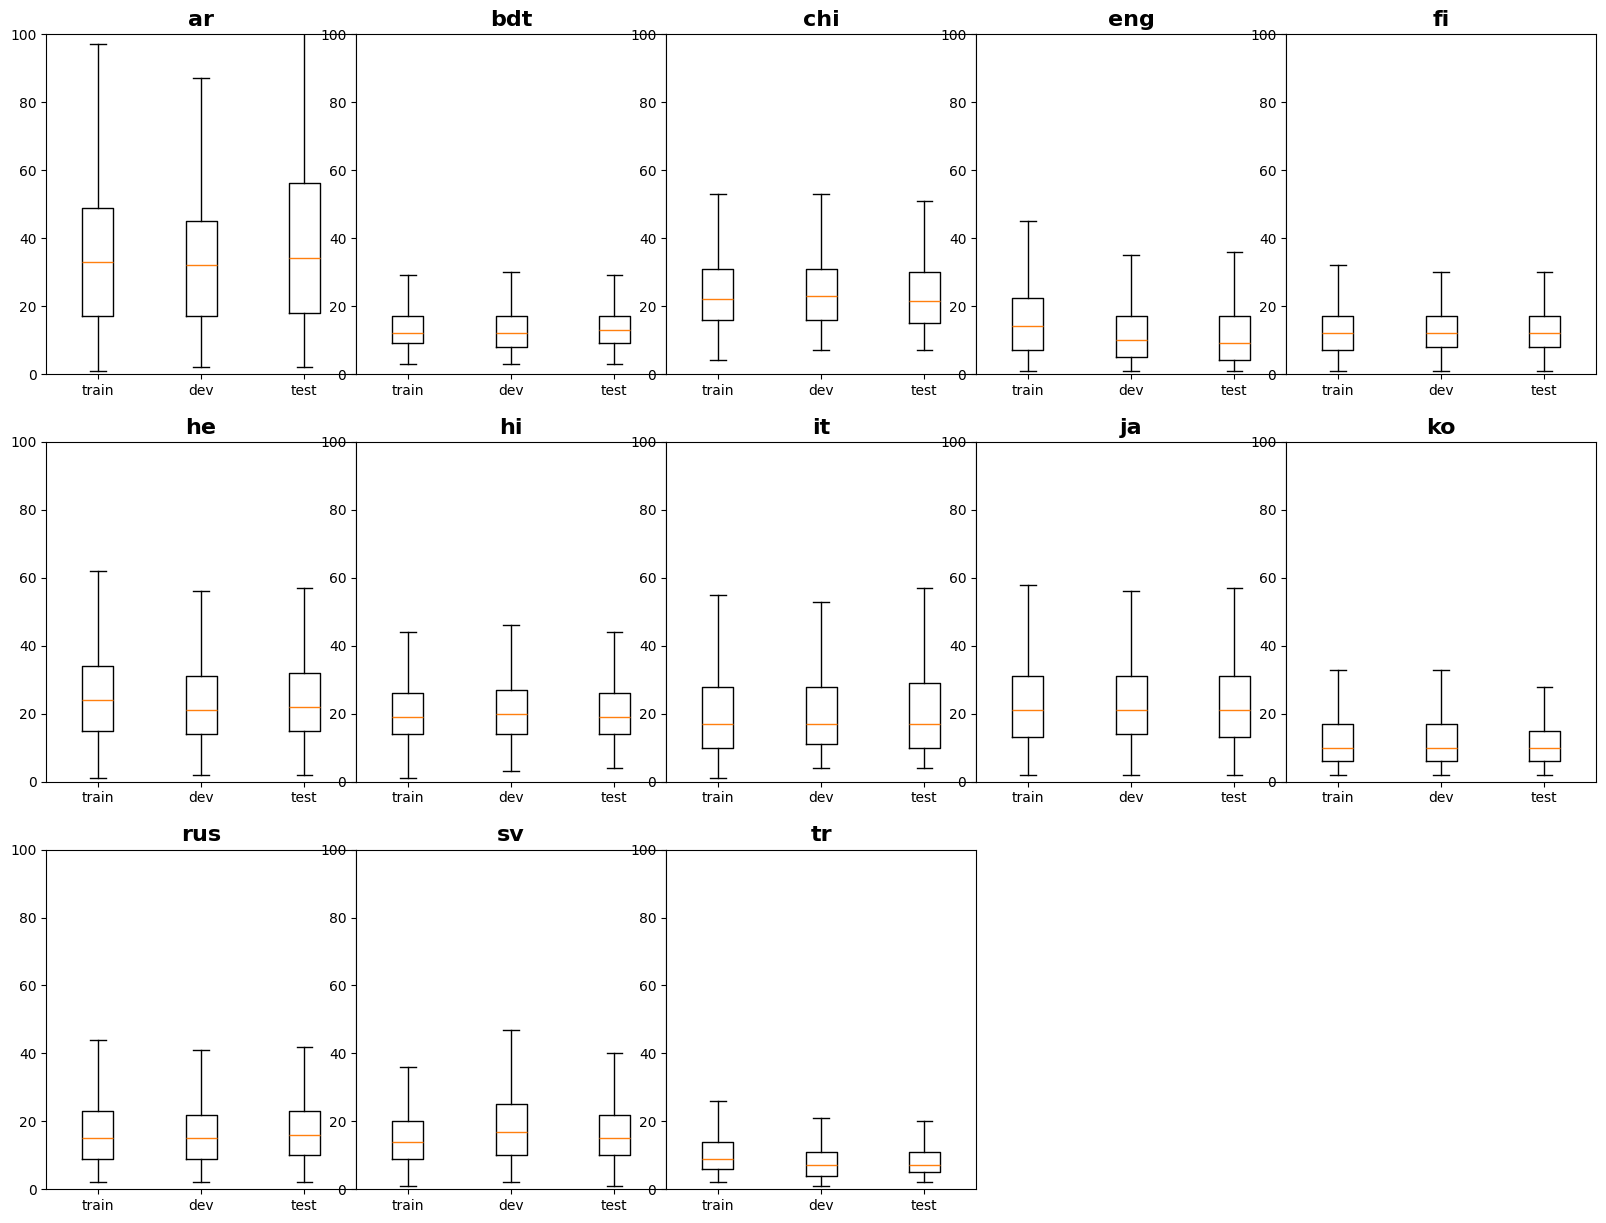

In [24]:
x_count = 3
y_count = 5
f, ax = plt.subplots(x_count, y_count, figsize=(20, 15))
#f.suptitle('Распределение длины зависимостей')

plt.subplots_adjust(wspace=0, hspace=0.2)
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    legend = False if i != len(languages) - 1 else True
    cur_ax.boxplot([[len(s.tokens) for s in sents[lang] if s.sentence_type==sent_type]
             for sent_type in sent_types],
            showfliers=False,showcaps=True, labels = sent_types)
    cur_ax.set_title(lang, size=16, weight="bold")
    cur_ax.set_ylim([0, 100])


plt.show()




## Группировка датасетов по токенам

In [25]:
import pandas as pd

In [26]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.tokens):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, w.root_depth, sent_i, sent.sentence_type))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "root_depth", "sent_i", "sentence_type"])
    return info_df

In [27]:
node_df_dict = {}
for lang in languages:
    node_df_dict[lang] = create_node_df(sents[lang])

In [28]:
node_df_dict['rus'].head()

,id,parent_id,relation,pos,form,lemma,root_depth,sent_i,sentence_type
0,1,0,root,NOUN,Анкета,анкета,1,0,train
1,2,1,punct,PUNCT,.,.,2,0,train
2,1,8,nsubj,NOUN,Начальник,начальник,2,1,train
3,2,3,amod,ADJ,областного,областной,4,1,train
4,3,1,nmod,NOUN,управления,управление,3,1,train


# Начальная форма

In [29]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

ar 0.05
bdt 0.09
chi 0.16
eng 0.07
fi 0.13
he 0.07
hi 0.04
it 0.07
ja 0.10
ko 0.45
rus 0.04
sv 0.11
tr 0.10


rus 0.04

eng 0.07

chi 0.16

# Часть речи

In [30]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['pos'])))

ar 17
bdt 17
chi 16
eng 17
fi 15
he 15
hi 16
it 17
ja 16
ko 16
rus 17
sv 17
tr 14


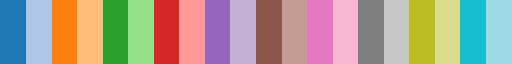

In [31]:
colormaps['tab20']

In [32]:
all_colors = list(colormaps['tab20'].colors[16:] + colormaps['tab20'].colors[:14])

In [33]:
all_colors = all_colors[10:] + all_colors[:10]

In [34]:
all_pos = set()
for lang in languages:
    all_pos |= set(node_df_dict[lang]['pos'])
all_pos = list(all_pos)
print(f"pos amount:{len(all_pos)}")

pos_colors = {}
for i, pos in enumerate(all_pos):
  pos_colors[pos] = all_colors[i]
pos_colors["OTHER"] = all_colors[len(all_pos)]

pos amount:17


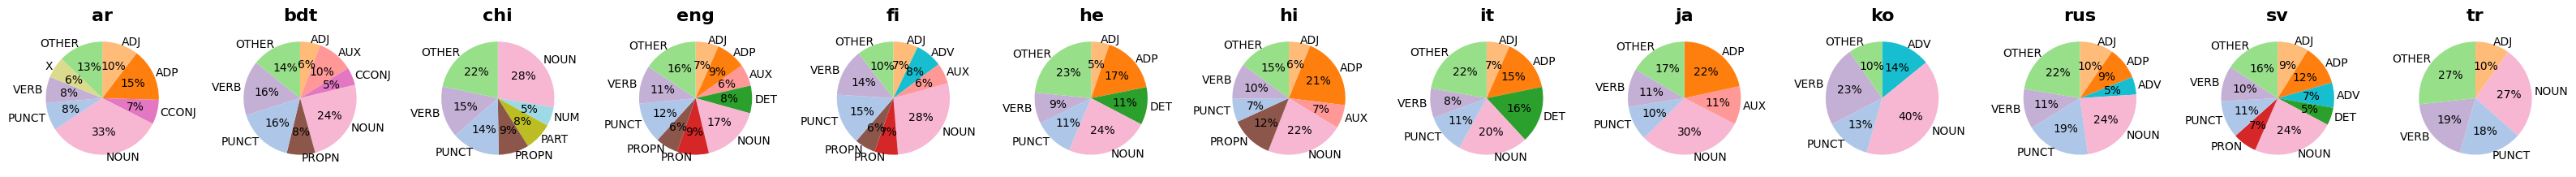

In [51]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 7))

plt.subplots_adjust(wspace=0.4, hspace=0.0)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['pos'])
    pos_amount = pos_counter.total()
    pos_dict = {}
    other = 0
    for label, value in pos_counter.items():
        if value / pos_amount < 0.05:
            other += value
        else:
            pos_dict[label] = value
    labels = sorted(pos_dict)
    values = [pos_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [pos_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d:.0f}%",
               counterclock=False, startangle=90, labeldistance=1.05,
               colors=colors)
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/pos_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [36]:
import matplotlib

In [37]:
sorted(matplotlib.font_manager.get_font_names())

['DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Humor Sans',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmb10',
 'cmex10',
 'cmmi10',
 'cmr10',
 'cmss10',
 'cmsy10',
 'cmtt10']

## relation

In [38]:
all_colors = colormaps['tab20b'].colors[7:] + colormaps['tab20b'].colors[:7]

In [39]:
all_rels = set()
for lang in languages:
    pos_counter = Counter(node_df_dict[lang]['relation'])
    all_rels |= {label for (label, value) in pos_counter.items()
                       if value / pos_counter.total() >= 0.05}
all_rels = list(all_rels)
print(f"relation amount with rate >= 5%:{len(all_rels)}")
rel_colors = {}
for i, relation in enumerate(all_rels):
  rel_colors[relation] = all_colors[i]
rel_colors["OTHER"] = all_colors[len(all_rels)]

relation amount with rate >= 5%:19


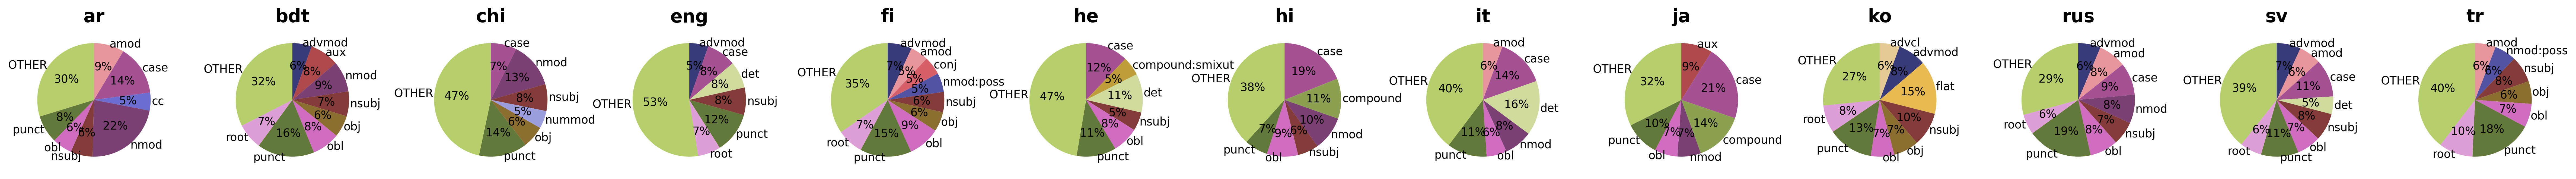

In [64]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4))

plt.subplots_adjust(wspace=0.4, hspace=0)
#ax[-1, -1].axis('off')
#ax[-1, -2].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['relation'])
    pos_amount = pos_counter.total()
    relation_dict = {}
    other = 0
    for label, value in pos_counter.items():
        if value / pos_amount < 0.05:
            other += value
        else:
            relation_dict[label] = value
    labels = sorted(relation_dict)
    values = [relation_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [rel_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d:.0f}%",
               labeldistance=1.02, counterclock=False, startangle=90,
               colors=colors)
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/relation_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['relation'])))

ar 36
bdt 33
chi 43
eng 51
fi 47
he 37
hi 28
it 45
ja 25
ko 34
rus 45
sv 44
tr 40


# Dependency length

In [42]:
from collections import Counter

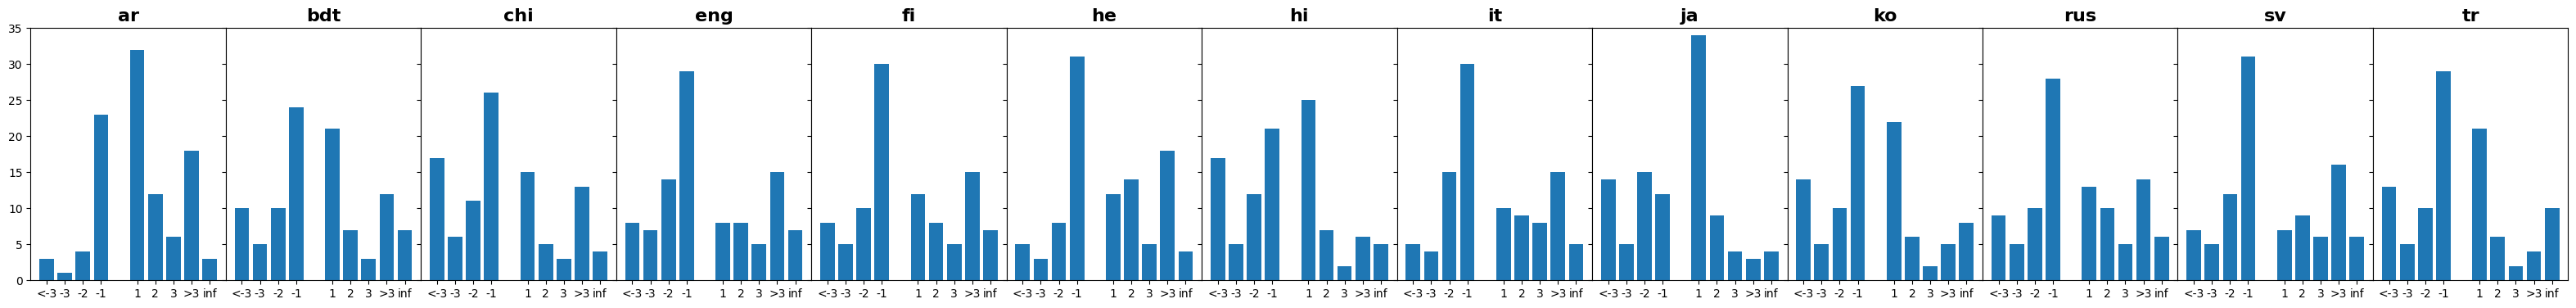

In [56]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4), sharey=True)

plt.subplots_adjust(wspace=0, hspace=0.2)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_dep_length = Counter((node_df_dict[lang]['id'].astype('int64') -
                            node_df_dict[lang]['parent_id'].astype('int64').replace(0, float('-inf'))))
    x = list(range(-3, 0)) + list(range(1, 4))
    total_lang = lang_dep_length.total()
    dep_lang = [round(lang_dep_length[i] / total_lang * 100, 0) for i in x]
    less = round(sum(v for (k, v) in lang_dep_length.items() if k < -3) / total_lang * 100, 0)
    great = round(sum(v for (k, v) in lang_dep_length.items() if k > 3 and k != float('inf')) / total_lang * 100, 0)
    inf = round(lang_dep_length[float("inf")] / total_lang * 100, 0)
    more_depth = [less] + dep_lang + [great, inf]
    cur_ax.bar([-4] + x + [4, 5], more_depth, tick_label= ["<-3"] + x + [">3", "inf"])
    cur_ax.set_ylim([0, 35])

    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/dependency_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [44]:
# Количество соотношение left к right

for lang in languages:
     print(lang
          , round(((node_df_dict[lang]['id'].astype('int64') < node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum()
          /  ((node_df_dict[lang]['id'].astype('int64') > node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum(), 2))

ar 0.46
bdt 1.13
chi 1.67
eng 1.6
fi 1.33
he 0.93
hi 1.4
it 1.3
ja 0.93
ko 1.6
rus 1.25
sv 1.45
tr 1.7


# Root depth

In [45]:
from collections import Counter

In [46]:
lang_root_depths = Counter(node_df_dict[lang]['root_depth'].astype('int64'))
[v for (k, v) in lang_root_depths.items() if k > 5]

[2241, 514, 1113, 222, 67, 12, 1]

In [47]:
lang_root_depths.items()

dict_items([(1, 5635), (2, 19673), (4, 8673), (5, 4602), (3, 15343), (6, 2241), (8, 514), (7, 1113), (9, 222), (10, 67), (11, 12), (12, 1)])

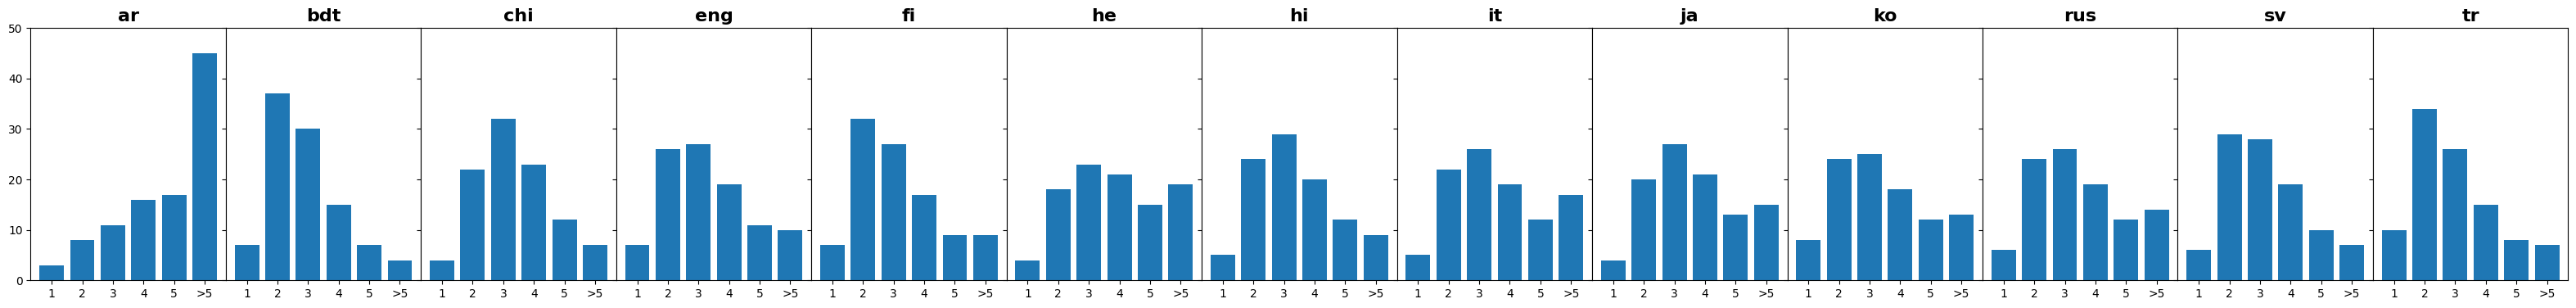

In [57]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4), sharey=True)

plt.subplots_adjust(wspace=0, hspace=0.2)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_root_depths = Counter(node_df_dict[lang]['root_depth'].astype('int64'))
    x = list(range(1, 6))
    total_lang = lang_root_depths.total()
    depth_lang = [round(lang_root_depths[i] / total_lang * 100, 0) for i in x]
    great = round(sum(v for (k, v) in lang_root_depths.items() if k > 5) / total_lang * 100, 0)
    more_depth = depth_lang + [great]
    cur_ax.bar(x + [6], more_depth, tick_label= x + [">5"])
    cur_ax.set_ylim([0, 50])

    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/depth_root.eps', format='eps', dpi=300, bbox_inches='tight')

plt.show()


# Image downloading

In [49]:
!zip -r /content/imgs.zip /content/imgs

  adding: content/imgs/ (stored 0%)
  adding: content/imgs/dataset_sizes.eps (deflated 70%)
  adding: content/imgs/pos_pies.eps (deflated 74%)
  adding: content/imgs/dependency_length.eps (deflated 87%)
  adding: content/imgs/dataset_pies.eps (deflated 66%)
  adding: content/imgs/sentence_length.eps (deflated 86%)
  adding: content/imgs/relation_pies.eps (deflated 74%)
  adding: content/imgs/depth_root.eps (deflated 86%)


In [50]:
from google.colab import files
files.download("/content/imgs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>